In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_titanic.csv to train_titanic.csv


In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***The complete data dictionary can be found under Kaggle's Titanic Survival Prediction Competition page***

***If the passenger survived --> 1***
***If the passenger died --> 0***

***Pclass refers to the ticket class - 1st, 2nd, 3rd class***

***sibsp - no of siblings/spouses on board***

***Parch- no of parents/children on board***

***Embarkation Ports - C = Cherbourg, Q = Queenstown, S = Southampton***

# ***Exploratory Data Analysis***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***38.38% of the training set survived the titanic***

***Ages ranges from 0.4 to 80. The median age of passengers in 28***

## ***1. Let's explore the correlation between gender, age and survival***

### ***Gender and Survival***

In [6]:
female = df.loc[df['Sex'] == 'female']
male = df.loc[df['Sex'] == 'male']

In [7]:
female.shape

(314, 12)

In [8]:
#female
female_survival = female.groupby('Survived', as_index=False)['PassengerId'].count()
female_survival.rename(columns={'PassengerId':'Count'}, inplace = True)
total_female = female.shape[0]
female_survival['percentage'] = female_survival['Count']/total_female
female_survival

,Survived,Count,percentage
0,0,81,0.257962
1,1,233,0.742038


***74% of the female passengers survived, 25.8% of the female passengers did not survive***

In [9]:
#male
male_survival = male.groupby('Survived', as_index=False)['PassengerId'].count()
male_survival.rename(columns={'PassengerId':'Count'}, inplace = True)
total_male = male.shape[0]
male_survival['percentage'] = male_survival['Count']/total_male
male_survival

,Survived,Count,percentage
0,0,468,0.811092
1,1,109,0.188908


***Only 18.9% of the male passengers survived, while 81% of male passengers did not survive***

In [10]:
female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### ***Age and Survival***

In [12]:
age_group_df = df.copy()

#Specify number of bins(n) and pandas will do the work by creating n equal sized bins
# age_group_df["age_group"] = pd.cut(df['Age'], 8)
# Or, specify the bins directly
age_group_df["age_group"] = pd.cut(df['Age'], bins = [0, 16, 25, 32,40, 50, 60, 70, 80])

age_group_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 40.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.0, 60.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.0, 16.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(25.0, 32.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.0, 16.0]"


In [13]:
#get total passengers in each age group
age_total = age_group_df.groupby(['age_group'], as_index = False)['PassengerId'].count()
age_total

,age_group,PassengerId
0,"(0, 16]",100
1,"(16, 25]",201
2,"(25, 32]",145
3,"(32, 40]",118
4,"(40, 50]",86
5,"(50, 60]",42
6,"(60, 70]",17
7,"(70, 80]",5


In [14]:
import numpy as np

In [15]:
age_count = age_group_df.groupby(['age_group', 'Survived'], as_index = False)['PassengerId'].count()

for index, row in age_count.iterrows():
  age_group = row.values[0] ## get the age group we're looking at for the particular row in df
  age_total_in_g2_list = list(np.where(age_total['age_group'] == age_group, age_total['PassengerId'], 0)) #check for this particular age group in g2 to get the total value before bifurcation
  # print(age_total_in_g2_list)
  try:
    age_total_in_g2 = [i for i in age_total_in_g2_list if i != 0][0]
  except IndexError:
    age_total_in_g2 = 0

  #Use the dataframe's row index to change the column value for that particular row
  age_count.at[index,'total'] = age_total_in_g2 
  #Alternatively, dataframe.loc[row index,['column-names']] = value

age_count = age_count.loc[age_count['total'] != 0]
age_count["percent"] = round((age_count["PassengerId"]/age_count["total"])*100,2)
age_count

,age_group,Survived,PassengerId,total,percent
0,"(0, 16]",0,45,100.0,45.00
1,"(0, 16]",1,55,100.0,55.00
2,"(16, 25]",0,132,201.0,65.67
3,"(16, 25]",1,69,201.0,34.33
4,"(25, 32]",0,86,145.0,59.31
5,"(25, 32]",1,59,145.0,40.69
6,"(32, 40]",0,66,118.0,55.93
7,"(32, 40]",1,52,118.0,44.07
8,"(40, 50]",0,53,86.0,61.63
9,"(40, 50]",1,33,86.0,38.37


[Text(0.5, 1.0, 'Passengers Survival Stats by Age Group')]

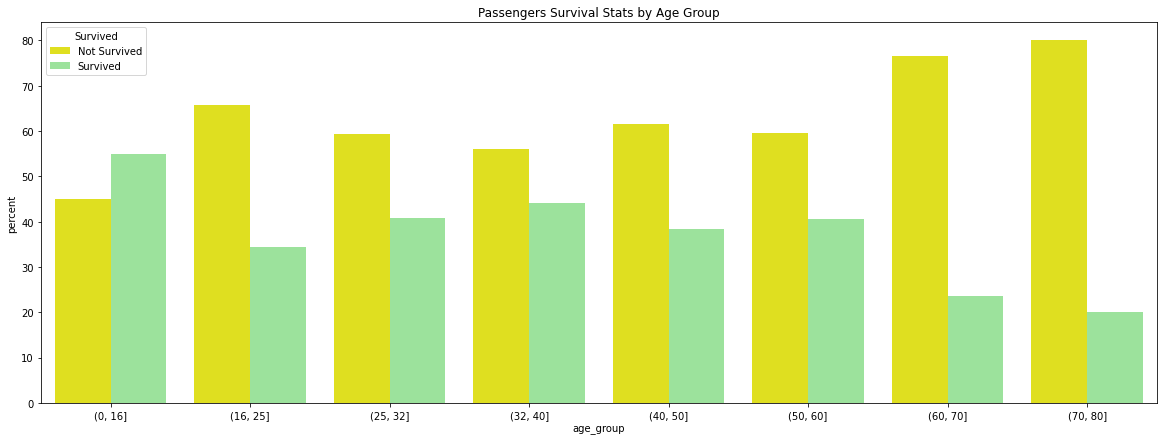

In [16]:
#Passenger Age Groups Survival Visualization
# Create an array with the colors you want to use
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "lightgreen"]
sns.set_palette(sns.color_palette(colors))

age_count['Survived'] = age_count['Survived'].replace([0, 1], ['Not Survived', 'Survived'])  

fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(data=age_count, x="age_group", y='percent', hue="Survived").set(title="Passengers Survival Stats by Age Group")

***Overall, Passengers below age 16 have the highest survival rates - only group where survival chances are higher than non-survival. This indicates that children were given higher preference during survival evacuation.***

***Do a age group, gender, survival grouped stacked bar chart, just like we did for passenger class***

### ***Gender, Age, and Survival***

In [17]:
#Bargraph for female -- age on x-axis, count of survive and not survived on y-axis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.qcut(female['Age'], 10)
female['age_group'] =  pd.qcut(female['Age'], 10)
male['age_group'] = pd.qcut(male['Age'], 10)

# sns.barplot(data=female, x="age_group", hue="Survived")
female
male

<ipython-input-17-68a61bcc86e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['age_group'] =  pd.qcut(female['Age'], 10)
<ipython-input-17-68a61bcc86e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['age_group'] = pd.qcut(male['Age'], 10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 23.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 36.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(51.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.419, 16.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,"(26.0, 29.0]"
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,"(23.0, 26.0]"
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(26.0, 29.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(23.0, 26.0]"


In [18]:
g2 = female.groupby(['age_group'], as_index = False)['PassengerId'].count()
g2

,age_group,PassengerId
0,"(0.749, 9.0]",30
1,"(9.0, 17.0]",25
2,"(17.0, 21.0]",29
3,"(21.0, 24.0]",33
4,"(24.0, 27.0]",16
5,"(27.0, 30.0]",25
6,"(30.0, 35.0]",30
7,"(35.0, 40.0]",25
8,"(40.0, 48.0]",24
9,"(48.0, 63.0]",24


In [19]:
m2 = male.groupby(['age_group'], as_index = False)['PassengerId'].count()
m2

,age_group,PassengerId
0,"(0.419, 16.0]",51
1,"(16.0, 20.0]",51
2,"(20.0, 23.0]",43
3,"(23.0, 26.0]",47
4,"(26.0, 29.0]",45
5,"(29.0, 32.0]",40
6,"(32.0, 36.0]",47
7,"(36.0, 42.0]",41
8,"(42.0, 51.0]",47
9,"(51.0, 80.0]",41


In [20]:
g = female.groupby(['Survived', 'age_group'], as_index = False)['PassengerId'].count()
g

,Survived,age_group,PassengerId
0,0,"(0.749, 9.0]",11
1,0,"(9.0, 17.0]",6
2,0,"(17.0, 21.0]",10
3,0,"(21.0, 24.0]",5
4,0,"(24.0, 27.0]",6
5,0,"(27.0, 30.0]",6
6,0,"(30.0, 35.0]",4
7,0,"(35.0, 40.0]",5
8,0,"(40.0, 48.0]",9
9,0,"(48.0, 63.0]",2


In [21]:
m = male.groupby(['Survived', 'age_group'], as_index = False)['PassengerId'].count()
m

,Survived,age_group,PassengerId
0,0,"(0.419, 16.0]",29
1,0,"(16.0, 20.0]",44
2,0,"(20.0, 23.0]",40
3,0,"(23.0, 26.0]",39
4,0,"(26.0, 29.0]",34
5,0,"(29.0, 32.0]",29
6,0,"(32.0, 36.0]",38
7,0,"(36.0, 42.0]",34
8,0,"(42.0, 51.0]",37
9,0,"(51.0, 80.0]",36


In [22]:
for index, row in g.iterrows():
  age = row.values[1] ## get the age group we're looking at for the particular row in g
  age_total_in_g2_list = list(np.where(g2['age_group'] == age, g2['PassengerId'], 0)) #check for this particular age group in g2 to get the total value before bifurcation
  age_total_in_g2 = [i for i in age_total_in_g2_list if i != 0][0]

  #Use the dataframe's row index to change the column value for that particular row
  g.at[index,'total'] = age_total_in_g2 
  #Alternatively, dataframe.loc[row index,['column-names']] = value

In [23]:
for index, row in m.iterrows():
  age_m = row.values[1] ## get the age group we're looking at for the particular row in g
  age_total_in_m2_list = list(np.where(m2['age_group'] == age_m, m2['PassengerId'], 0)) #check for this particular age group in g2 to get the total value before bifurcation
  age_total_in_m2 = [i for i in age_total_in_m2_list if i != 0][0]

  #Use the dataframe's row index to change the column value for that particular row
  m.at[index,'total'] = age_total_in_m2 
  #Alternatively, dataframe.loc[row index,['column-names']] = value

In [24]:
#Female survival and non-survival rates
g['Percentage'] = round((g['PassengerId']/g['total'])*100,2)
# g['Percentage'] = g['Percentage'].apply( lambda x : str(x) + '%')
g["sex"] = "female"
g

,Survived,age_group,PassengerId,total,Percentage,sex
0,0,"(0.749, 9.0]",11,30.0,36.67,female
1,0,"(9.0, 17.0]",6,25.0,24.00,female
2,0,"(17.0, 21.0]",10,29.0,34.48,female
3,0,"(21.0, 24.0]",5,33.0,15.15,female
4,0,"(24.0, 27.0]",6,16.0,37.50,female
5,0,"(27.0, 30.0]",6,25.0,24.00,female
6,0,"(30.0, 35.0]",4,30.0,13.33,female
7,0,"(35.0, 40.0]",5,25.0,20.00,female
8,0,"(40.0, 48.0]",9,24.0,37.50,female
9,0,"(48.0, 63.0]",2,24.0,8.33,female


In [25]:
#Male survival and non-survival rates
m['Percentage'] = round((m['PassengerId']/m['total'])*100,2)
# g['Percentage'] = g['Percentage'].apply( lambda x : str(x) + '%')
m["sex"] = "male"
m

,Survived,age_group,PassengerId,total,Percentage,sex
0,0,"(0.419, 16.0]",29,51.0,56.86,male
1,0,"(16.0, 20.0]",44,51.0,86.27,male
2,0,"(20.0, 23.0]",40,43.0,93.02,male
3,0,"(23.0, 26.0]",39,47.0,82.98,male
4,0,"(26.0, 29.0]",34,45.0,75.56,male
5,0,"(29.0, 32.0]",29,40.0,72.50,male
6,0,"(32.0, 36.0]",38,47.0,80.85,male
7,0,"(36.0, 42.0]",34,41.0,82.93,male
8,0,"(42.0, 51.0]",37,47.0,78.72,male
9,0,"(51.0, 80.0]",36,41.0,87.80,male


[Text(0.5, 1.0, 'Female Passengers Survival Stats by Age Groups')]

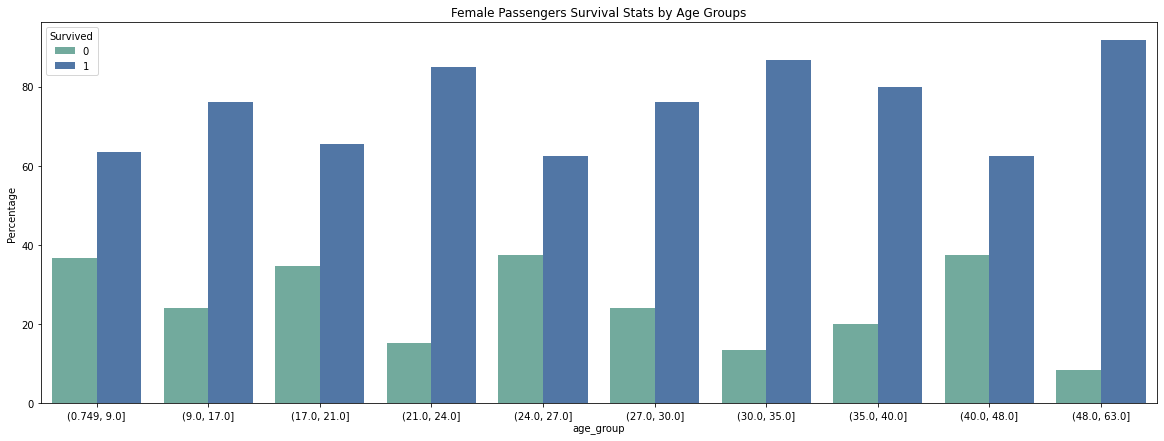

In [26]:
#Female Survival Visualization
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(data=g, x="age_group", y='Percentage', hue="Survived").set(title='Female Passengers Survival Stats by Age Groups')
# ax.bar_label(ax.containers[0], padding=10)

# for container, percentage in zip(ax.containers, g.Percentage):
#   ax.bar_label(container, labels=[percentage, percentage])

#add % of survive and no survive for each age group to set the relevance
#add title to chart
#will a distplot explain this better?

[Text(0.5, 1.0, 'Male Passengers Survival Stats by Age Groups')]

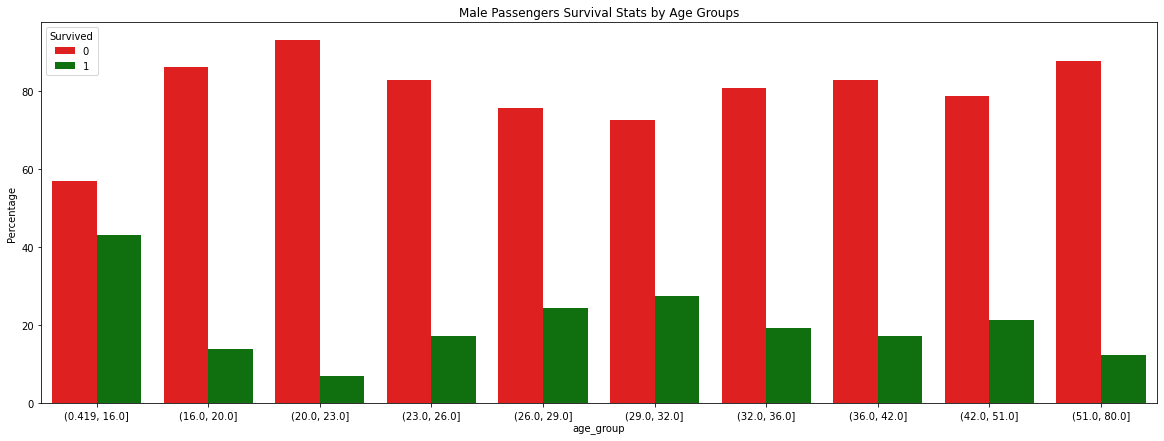

In [27]:
#Female Survival Visualization
# Create an array with the colors you want to use
colors = ["red", "green"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(data=m, x="age_group", y='Percentage', hue="Survived").set(title="Male Passengers Survival Stats by Age Groups")
#.set(title='Male Passengers Survival Stats by Age Groups')
# ax.bar_label(ax.containers[0], padding=10)

# for container, percentage in zip(ax.containers, g.Percentage):
#   ax.bar_label(container, labels=[percentage, percentage])

#add % of survive and no survive for each age group to set the relevance
#add title to chart
#will a distplot explain this better?

***What does a displot do? sns.displot??***

### ***Now that we see the distribution of survival rates among male and female in different age groups, ....***

In [28]:
frames = [m,g]
mg = pd.concat(frames)
mg = mg.reset_index()
mg["Survived"] = mg["Survived"].astype(str)
# mg = mg.sort_values(by=["age_group"])
mg

,index,Survived,age_group,PassengerId,total,Percentage,sex
0,0,0,"(0.419, 16.0]",29,51.0,56.86,male
1,1,0,"(16.0, 20.0]",44,51.0,86.27,male
2,2,0,"(20.0, 23.0]",40,43.0,93.02,male
3,3,0,"(23.0, 26.0]",39,47.0,82.98,male
4,4,0,"(26.0, 29.0]",34,45.0,75.56,male
5,5,0,"(29.0, 32.0]",29,40.0,72.50,male
6,6,0,"(32.0, 36.0]",38,47.0,80.85,male
7,7,0,"(36.0, 42.0]",34,41.0,82.93,male
8,8,0,"(42.0, 51.0]",37,47.0,78.72,male
9,9,0,"(51.0, 80.0]",36,41.0,87.80,male


In [29]:
mg["age_group"] = mg["age_group"].astype(str)

***Overall, women have a higher chance of survival than men. Out of all female population, 74% survived while only 19% of the male population survived.***

***Within the female population, women in the age group of 21 - 63 had higher chances of survival than female passengers below 21 years***

***Among the male population, passengers between the age group 16 - 26 had the lowest chances of survival***

***We can explore the impact of specific age groups, without the light of sex of the passenger, in a later section***

## ***2. Let's explore the correlation between passenger class and survival***

In [30]:
#passenger class groupby
class_group = df.groupby(['Pclass', 'Survived'], as_index=False)['PassengerId'].count()
class_group.rename(columns={'PassengerId':'Count'}, inplace = True)

#calculate total passengers in each class
class1_total = (df.loc[df['Pclass'] == 1]).shape[0]
class2_total = (df.loc[df['Pclass'] == 2]).shape[0]
class3_total = (df.loc[df['Pclass'] == 3]).shape[0]

class_group["Percentage"] = 0

class_group

,Pclass,Survived,Count,Percentage
0,1,0,80,0
1,1,1,136,0
2,2,0,97,0
3,2,1,87,0
4,3,0,372,0
5,3,1,119,0


In [31]:
for index, row in class_group.iterrows():
  class_n = row.values[0] ## get the class we're looking at for the particular row in class_group
  row_count = row.values[2]

  if class_n == 1:
    percent = row_count/class1_total
  elif class_n == 2:
    percent = row_count/class2_total
  elif class_n == 3:
    percent = row_count/class3_total

  #Use the dataframe's row index to change the column value for that particular row
  class_group.loc[index,['Percentage']] = percent*100
  # Alternatively, class_group.at[index,'Percentage'] = percent

  
class_group

,Pclass,Survived,Count,Percentage
0,1,0,80,37.037037
1,1,1,136,62.962963
2,2,0,97,52.717391
3,2,1,87,47.282609
4,3,0,372,75.763747
5,3,1,119,24.236253


[Text(0.5, 1.0, 'Passengers Survival Stats by Class')]

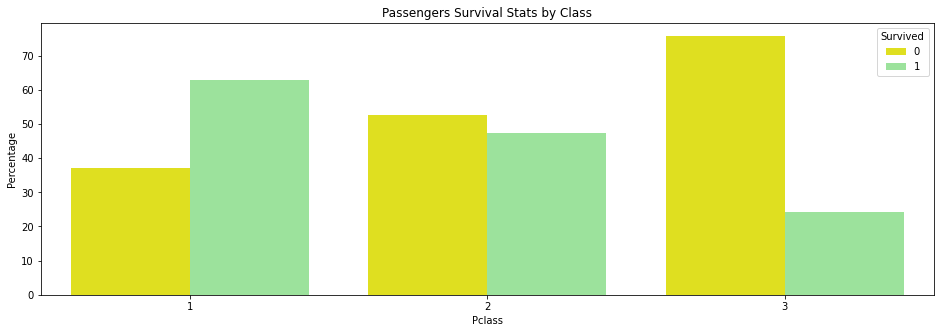

In [32]:
#Passenger Class Survival Visualization
# Create an array with the colors you want to use
colors = ["yellow", "lightgreen"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(data=class_group, x="Pclass", y='Percentage', hue="Survived").set(title="Passengers Survival Stats by Class")

***There is a direct correlation between the class of the passengers and the survival rates. Passengers of a higher class had a greater chance of survival compared to passengers of lower classes. Regardless of gender, survival chancea of a first class passenger is 63%, second class passenger id 47.3%, and a third class passener is 24.2%.***

### ***Is there a significant difference in the survival bifurcation between genders within classes?***

In [33]:
(df.loc[(df['Pclass'] == 1) & (df['Sex'] == 'male')]).shape[0]

122

In [34]:
#calculate total passengers in each class and gender
class1_male_total = (df.loc[(df['Pclass'] == 1) & (df['Sex'] == 'male')]).shape[0]
class1_female_total = (df.loc[(df['Pclass'] == 1) & (df['Sex'] == 'female')]).shape[0]
class2_male_total = (df.loc[(df['Pclass'] == 2) & (df['Sex'] == 'male')]).shape[0]
class2_female_total = (df.loc[(df['Pclass'] == 2) & (df['Sex'] == 'female')]).shape[0]
class3_male_total = (df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'male')]).shape[0]
class3_female_total = (df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'female')]).shape[0]

#passenger class groupby
class_gender_group = df.groupby(['Pclass', 'Sex', 'Survived'], as_index=False)['PassengerId'].count()
class_gender_group.rename(columns={'PassengerId':'Count'}, inplace = True)
class_gender_group["Percentage"] = 0

class_gender_group

,Pclass,Sex,Survived,Count,Percentage
0,1,female,0,3,0
1,1,female,1,91,0
2,1,male,0,77,0
3,1,male,1,45,0
4,2,female,0,6,0
5,2,female,1,70,0
6,2,male,0,91,0
7,2,male,1,17,0
8,3,female,0,72,0
9,3,female,1,72,0


In [35]:
for index, row in class_gender_group.iterrows():
  class_n = row.values[0] ## get the class we're looking at for the particular row in class_group
  row_count = row.values[3]
  gender = row.values[1]

  if class_n == 1 and gender =='male':
    percent = row_count/class1_male_total
  if class_n == 1 and gender =='female':
    percent = row_count/class1_female_total
  elif class_n == 2 and gender == 'male':
    percent = row_count/class2_male_total
  elif class_n == 2 and gender == 'female':
    percent = row_count/class2_female_total
  elif class_n == 3 and gender == 'male':
    percent = row_count/class3_male_total
  elif class_n == 3 and gender == 'female':
    percent = row_count/class3_female_total

  #Use the dataframe's row index to change the column value for that particular row
  class_gender_group.loc[index,['Percentage']] = percent*100
  # Alternatively, class_group.at[index,'Percentage'] = percent

class_gender_group['Survived'] = class_gender_group['Survived'].replace([0, 1], ['Not Survived', 'Survived'])  
class_gender_group

,Pclass,Sex,Survived,Count,Percentage
0,1,female,Not Survived,3,3.191489
1,1,female,Survived,91,96.808511
2,1,male,Not Survived,77,63.114754
3,1,male,Survived,45,36.885246
4,2,female,Not Survived,6,7.894737
5,2,female,Survived,70,92.105263
6,2,male,Not Survived,91,84.259259
7,2,male,Survived,17,15.740741
8,3,female,Not Survived,72,50.000000
9,3,female,Survived,72,50.000000


In [36]:
import plotly.graph_objects as go

fig = go.Figure()

fig.update_layout(
    template="simple_white",
    # xaxis=dict(title_text="Week"),
    # yaxis=dict(title_text="Count"),
    barmode="stack",
)

colors = ["indianred", "lightgreen"]

for r, c in zip(class_gender_group.Survived.unique(), colors):
    plot_df = class_gender_group[class_gender_group.Survived == r]
    fig.add_trace(
        go.Bar(x=[plot_df.Pclass, plot_df.Sex], y=plot_df.Percentage, name=r, marker_color=c),
    )

fig.update_layout(title_text='Passenger Survival Stats by Class and Gender', title_x=0.5)

fig

***In the previous section, we observed a direct correlation between class and survival rates. HIgher the class of the passenger, greater their survival rates. On adding the gender layer on top of that, we do see that for both male and female passengers, belonging to a higher class results in higher survival chances.***

***For female passengers, the chances of survival are 96.8%, 92.1% and 50% for 1st class, 2nd class, and 3rd class passengers respectively.***

***For male passengers, the chances of survival are 36.9%, 15.7% and 13.5% for 1st class, 2nd class, and 3rd class respectively.***

***Comparing the survival rates of passengers from different classes for both gender groups, female passengers overall have a higher chance of survival than male passengers.***

## ***Does the Embarked port have an effect on survival?***

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
embarked_total = df.groupby(['Embarked'], as_index=False)['PassengerId'].count()
embarked_total

,Embarked,PassengerId
0,C,168
1,Q,77
2,S,644


In [39]:
embarked_count = df.groupby(['Embarked', 'Survived'], as_index=False)['PassengerId'].count()
embarked_count["Percentage"] = 0

port_C = df.loc[df["Embarked"] == 'C'].shape[0]
port_Q = df.loc[df["Embarked"] == 'Q'].shape[0]
port_S = df.loc[df["Embarked"] == 'S'].shape[0]

for index, row in embarked_count.iterrows():
  port_n = row.values[0] ## get the class we're looking at for the particular row in class_group
  row_count = row.values[2]

  if port_n == 'C':
    percent = row_count/port_C
  elif port_n == 'Q':
    percent = row_count/port_Q
  elif port_n == 'S':
    percent = row_count/port_S

  #Use the dataframe's row index to change the column value for that particular row
  embarked_count.loc[index,['Percentage']] = percent*100
  # Alternatively, class_group.at[index,'Percentage'] = percent

embarked_count

,Embarked,Survived,PassengerId,Percentage
0,C,0,75,44.642857
1,C,1,93,55.357143
2,Q,0,47,61.038961
3,Q,1,30,38.961039
4,S,0,427,66.304348
5,S,1,217,33.695652


***The data distribution is unbalanced for passengers embarking from different ports. Most of the passengers embarked from port S (72.4%), and only 77 passengers from port Q.***

***Because of this unbalanced distribution, we cannot certainly conclude if the embarked port has an effect on survival.***

## ***SibSp and ParCh makes more sense if they are taken as a combined feature -- total relatives on bored***

In [40]:
df["relative"] = df["SibSp"] + df["Parch"]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relative
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [41]:
df["alone?"] = None

for index, row in df.iterrows():
  relative_no = row.values[12]
  if relative_no > 0:
    alone = 'No'
  else:
    alone = 'Yes'

  df.loc[index,['alone?']] = alone

df  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relative,alone?
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Yes
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Yes


In [42]:
relative_count = df.groupby(['relative', 'Survived'], as_index=False)['PassengerId'].count()
relative_count

,relative,Survived,PassengerId
0,0,0,374
1,0,1,163
2,1,0,72
3,1,1,89
4,2,0,43
5,2,1,59
6,3,0,8
7,3,1,21
8,4,0,12
9,4,1,3


In [43]:
relative_count["Percentage"] = 0

for index, row in relative_count.iterrows():
  relative_n = row.values[0] ## get the no of relatives
  row_count = row.values[2]

  percent = row_count/(df.loc[df["relative"] == relative_n].shape[0])

  #Use the dataframe's row index to change the column value for that particular row
  relative_count.loc[index,['Percentage']] = percent*100
  # Alternatively, class_group.at[index,'Percentage'] = percent

relative_count

,relative,Survived,PassengerId,Percentage
0,0,0,374,69.646182
1,0,1,163,30.353818
2,1,0,72,44.720497
3,1,1,89,55.279503
4,2,0,43,42.156863
5,2,1,59,57.843137
6,3,0,8,27.586207
7,3,1,21,72.413793
8,4,0,12,80.000000
9,4,1,3,20.000000


[Text(0.5, 1.0, 'Passengers Survival Stats by No. of Relatives - COUNT')]

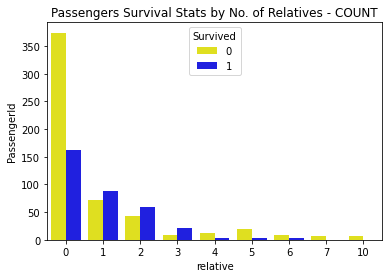

In [44]:
colors = ["yellow", "blue"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(data=relative_count, x="relative", y='PassengerId', hue="Survived").set(title="Passengers Survival Stats by No. of Relatives - COUNT")

[Text(0.5, 1.0, 'Passengers Survival Stats by No. of Relatives - PERCENTAGE')]

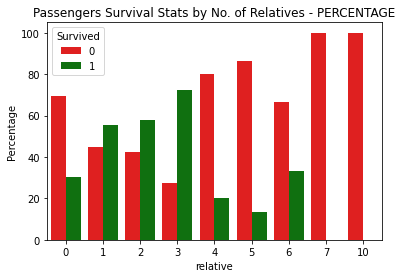

In [45]:
colors = ["red", "green"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(data=relative_count, x="relative", y='Percentage', hue="Survived").set(title="Passengers Survival Stats by No. of Relatives - PERCENTAGE")

***Passengers with 1 - 3 relatives had the highest chance of survival.***

# ***Data PreProcessing***

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  relative     891 non-null    int64  
 13  alone?       891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


***70% of the Cabin values are missing - we can drop this feature***

***However, we did notice that the first letter of the cabin number refers to the Deck of the ship -- we can extract deck from cabin***

In [47]:
import re
deck_no = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

#fill missing cabin
df['Cabin'] = df['Cabin'].fillna("U0")
df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df['Deck'] = df['Deck'].map(deck_no)
df['Deck'] = df['Deck'].fillna(0)
df['Deck'] = df['Deck'].astype(int)

df = df.drop(["Cabin"], axis=1)
df = df.drop(["Name"], axis=1)
df = df.drop(["Ticket"], axis=1)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relative,alone?,Deck
0,1,0,3,male,22.0,1,0,7.2500,S,1,No,8
1,2,1,1,female,38.0,1,0,71.2833,C,1,No,3
2,3,1,3,female,26.0,0,0,7.9250,S,0,Yes,8
3,4,1,1,female,35.0,1,0,53.1000,S,1,No,3
4,5,0,3,male,35.0,0,0,8.0500,S,0,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,Yes,8
887,888,1,1,female,19.0,0,0,30.0000,S,0,Yes,2
888,889,0,3,female,NaN,1,2,23.4500,S,3,No,8
889,890,1,1,male,26.0,0,0,30.0000,C,0,Yes,3


***20% of the Age values are missing - From our EDA, we discovered that age/age group of passengers is an important feature to determine survival chances of a passengers, especially since we identified patterns.***

***The simplest approach is to impute missing values with the mean or median age in the dataset. A more accurate approach would be to impute the missing ages with the mean or median ages of a group of similar passengers. For example: Mean/Median age of male/female passengers in the same class -- let's take the gender + class approach to impute missing age.***

In [48]:
#Calculate median ages for each class-gender group
class1_male_median_age = (df.loc[(df['Pclass'] == 1) & (df['Sex'] == 'male')])["Age"].median()
class1_female_median_age = (df.loc[(df['Pclass'] == 1) & (df['Sex'] == 'female')])["Age"].median()
class2_male_median_age = (df.loc[(df['Pclass'] == 2) & (df['Sex'] == 'male')])["Age"].median()
class2_female_median_age = (df.loc[(df['Pclass'] == 2) & (df['Sex'] == 'female')])["Age"].median()
class3_male_median_age = (df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'male')])["Age"].median()
class3_female_median_age = (df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'female')])["Age"].median()

In [49]:
#Impute Missing Ages
for index, row in df.iterrows():
  Pclass = row.values[2]
  sex = row.values[4]
  age = row.values[5]

  if np.isnan(age): ## check if variable is float nan
    if Pclass == 1:
      if sex == 'male':
        age = class1_male_median_age
      else:
        age = class1_female_median_age
    if Pclass == 2:
      if sex == 'male':
        age = class2_male_median_age
      else:
        age = class2_female_median_age
    if Pclass == 3:
      if sex == 'male':
        age = class3_male_median_age
      else:
        age = class3_female_median_age

  df.loc[index,['Age']] = age

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relative,alone?,Deck
0,1,0,3,male,1.0,1,0,7.2500,S,1,No,8
1,2,1,1,female,1.0,1,0,71.2833,C,1,No,3
2,3,1,3,female,0.0,0,0,7.9250,S,0,Yes,8
3,4,1,1,female,1.0,1,0,53.1000,S,1,No,3
4,5,0,3,male,0.0,0,0,8.0500,S,0,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0.0,0,0,13.0000,S,0,Yes,8
887,888,1,1,female,0.0,0,0,30.0000,S,0,Yes,2
888,889,0,3,female,1.0,1,2,23.4500,S,3,No,8
889,890,1,1,male,0.0,0,0,30.0000,C,0,Yes,3


In [50]:
#fare per person - can be correlated to class
df["fare_per_person"] = 0

df["fare_per_person"] = (df["Fare"]/(df["relative"]+1)).astype(int)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relative,alone?,Deck,fare_per_person
0,1,0,3,male,1.0,1,0,7.2500,S,1,No,8,3
1,2,1,1,female,1.0,1,0,71.2833,C,1,No,3,35
2,3,1,3,female,0.0,0,0,7.9250,S,0,Yes,8,7
3,4,1,1,female,1.0,1,0,53.1000,S,1,No,3,26
4,5,0,3,male,0.0,0,0,8.0500,S,0,Yes,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0.0,0,0,13.0000,S,0,Yes,8,13
887,888,1,1,female,0.0,0,0,30.0000,S,0,Yes,2,30
888,889,0,3,female,1.0,1,2,23.4500,S,3,No,8,5
889,890,1,1,male,0.0,0,0,30.0000,C,0,Yes,3,30


In [51]:
embarked_mode = 'S'

df["Embarked"] = df["Embarked"].fillna(embarked_mode)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    object 
 9   relative         891 non-null    int64  
 10  alone?           891 non-null    object 
 11  Deck             891 non-null    int64  
 12  fare_per_person  891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


### ***Let's convert the features to numeric prior to modeling -- categorical features will be label encoded to int and float will be converted to integers.***

In [52]:
df["Age"] = df["Age"].astype(int)
df["Fare"] = df["Fare"].astype(int)

***Label Encode Categorical Features***

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["Sex"] = label_encoder.fit_transform(df["Sex"])
print("Genger encoding: ", label_encoder.classes_)
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])
print("Embarked encoding: ", label_encoder.classes_)
df["alone?"] = label_encoder.fit_transform(df["alone?"])
print("Alone? encoding: ", label_encoder.classes_)

df

Genger encoding:  ['female' 'male']
Embarked encoding:  ['C' 'Q' 'S']
Alone? encoding:  ['No' 'Yes']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relative,alone?,Deck,fare_per_person
0,1,0,3,1,1,1,0,7,2,1,0,8,3
1,2,1,1,0,1,1,0,71,0,1,0,3,35
2,3,1,3,0,0,0,0,7,2,0,1,8,7
3,4,1,1,0,1,1,0,53,2,1,0,3,26
4,5,0,3,1,0,0,0,8,2,0,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,0,13,2,0,1,8,13
887,888,1,1,0,0,0,0,30,2,0,1,2,30
888,889,0,3,0,1,1,2,23,2,3,0,8,5
889,890,1,1,1,0,0,0,30,0,0,1,3,30


# ***ML Modeling***

***For a binary classification problem - survived or not survived, we'll deploy the following ML models to test accuracy:***


*   Logistic Regression
*   Random Forest
*   Decision Tree
*   K Nearest Neighbor
*   Gaussian Naive Bayes
*   Linear Support Vector Machine
*   Perceptron
*   Cat Boost Classifier 









In [54]:
train_df_X = df.drop(["PassengerId", "Survived", "Fare", "Deck"], axis=1)
train_df_y = df[["Survived"]]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df_X, train_df_y, random_state=0)

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_val)

score = accuracy_score(Y_pred, Y_val)
print("Accuracy Score for Titanic Survival Prediction using Logistic Regression Model is: ", score)

Accuracy Score for Titanic Survival Prediction using Logistic Regression Model is:  0.7847533632286996


In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_estimators=150)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_val)
score = accuracy_score(Y_pred, Y_val)
print("Accuracy Score for Titanic Survival Prediction using Random Forest Model is: ", score)

Accuracy Score for Titanic Survival Prediction using Random Forest Model is:  0.820627802690583


In [75]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_val)
score = accuracy_score(Y_pred, Y_val)
print("Accuracy Score for Titanic Survival Prediction using Decision Tree Model is: ", score)

Accuracy Score for Titanic Survival Prediction using Decision Tree Model is:  0.8161434977578476
